In [1]:
!pip install pynrrd

In [1]:
import glob
import nrrd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import Sequence

In [2]:
raw_dir = "RawUSGimagesNRRD"
raw_images = raw_dir + "/data_output"
raw_masks = raw_dir + "/masks"

In [3]:
raw_images_paths = sorted(glob.glob(raw_images + '**/*', recursive=True))
raw_masks_paths = sorted(glob.glob(raw_masks + '**/*', recursive=True))

In [4]:
tf.random.uniform(shape=[], minval=0, maxval=2, dtype=tf.int32)

2023-03-24 19:12:27.361170: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-24 19:12:27.361240: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [5]:
from dataset.dataset import UltraSoundImages

In [6]:
VAL_LEN = 60
TRAIN_LEN = len(raw_images_paths) - VAL_LEN

In [7]:
train_gen = UltraSoundImages(4, raw_images_paths[:TRAIN_LEN], raw_masks_paths[:TRAIN_LEN], size=(512,512))
val_gen = UltraSoundImages(4, raw_images_paths[-VAL_LEN:], raw_masks_paths[-VAL_LEN:], size=(512,512))

Loading images from NRRD format and resizing
Finished loading
Loading images from NRRD format and resizing
Finished loading


In [10]:
np.amax(train_gen.__getitem__(0)[0][0])

0.9983771

In [11]:
np.amax(train_gen.__getitem__(0)[1][0])

1.0

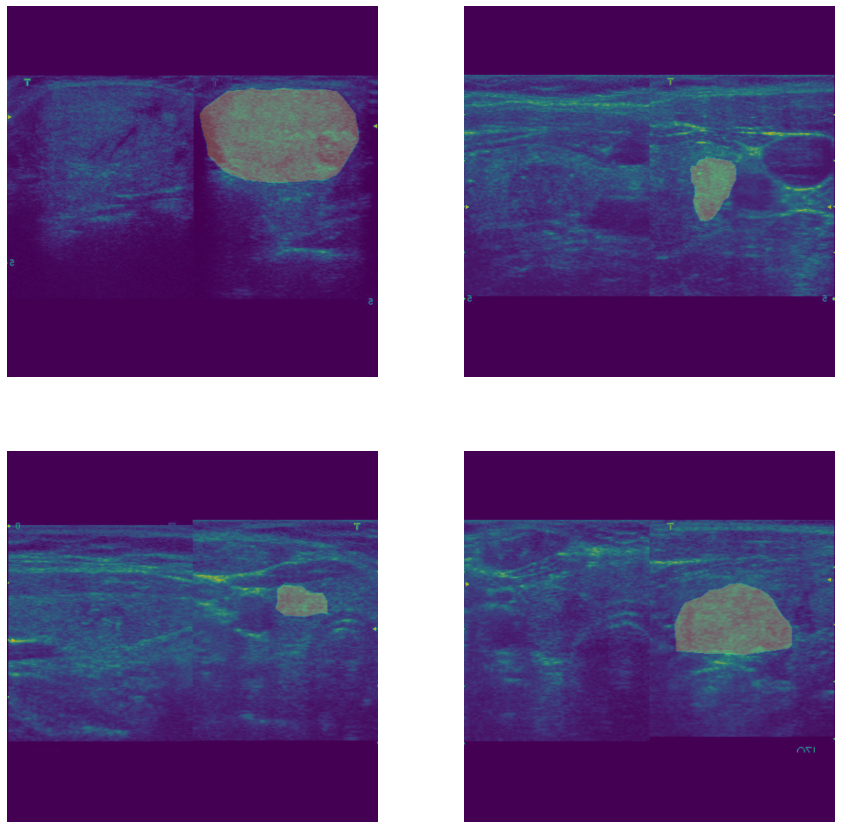

In [13]:
images, masks = train_gen.__getitem__(0)

i = 0
plt.figure(figsize=(15, 15))
for image, mask in zip(images, masks):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.25)
    plt.axis('off')
    i+=1
plt.show()

In [12]:
from models import unet_model

In [13]:
unet = unet_model((512,512,1), 1)
unet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 512, 512, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 128)    0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 256)     295168

In [14]:
unet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Create the EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [120]:
# Train the model with the EarlyStopping callback
# history = unet.fit(train_gen, epochs=10, callbacks=[early_stopping])

Epoch 1/10
120/120 [==============================] - 18s 147ms/step - loss: 0.2996 - accuracy: 0.9023
Epoch 2/10
120/120 [==============================] - 18s 147ms/step - loss: 0.2311 - accuracy: 0.9087
Epoch 3/10
120/120 [==============================] - 18s 147ms/step - loss: 0.2233 - accuracy: 0.9087
Epoch 4/10
120/120 [==============================] - 18s 147ms/step - loss: 0.2321 - accuracy: 0.9087
Epoch 5/10
120/120 [==============================] - 18s 148ms/step - loss: 0.2204 - accuracy: 0.9087
Epoch 6/10
120/120 [==============================] - 18s 148ms/step - loss: 0.2242 - accuracy: 0.9087
Epoch 7/10
120/120 [==============================] - 18s 148ms/step - loss: 0.2320 - accuracy: 0.9087
Epoch 8/10
120/120 [==============================] - 18s 148ms/step - loss: 0.2161 - accuracy: 0.9087
Epoch 9/10
120/120 [==============================] - 18s 147ms/step - loss: 0.2371 - accuracy: 0.9086
Epoch 10/10
120/120 [==============================] - 18s 147ms/step - l

In [21]:
def plot_history(history):
    # Extract the history values
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    # Plot the loss values
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'])
    plt.show()

    # Plot the accuracy values
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    plt.show()

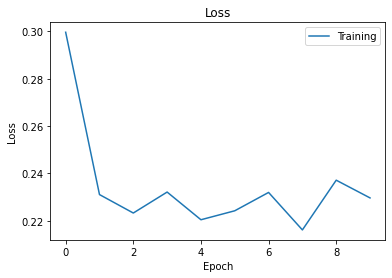

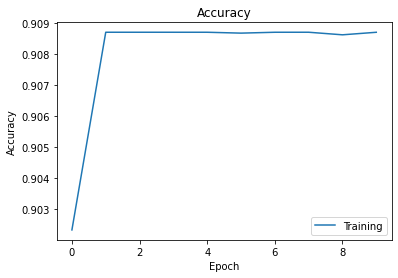

In [122]:
# plot_history(history)

1/1 [==============================] - 0s 88ms/step


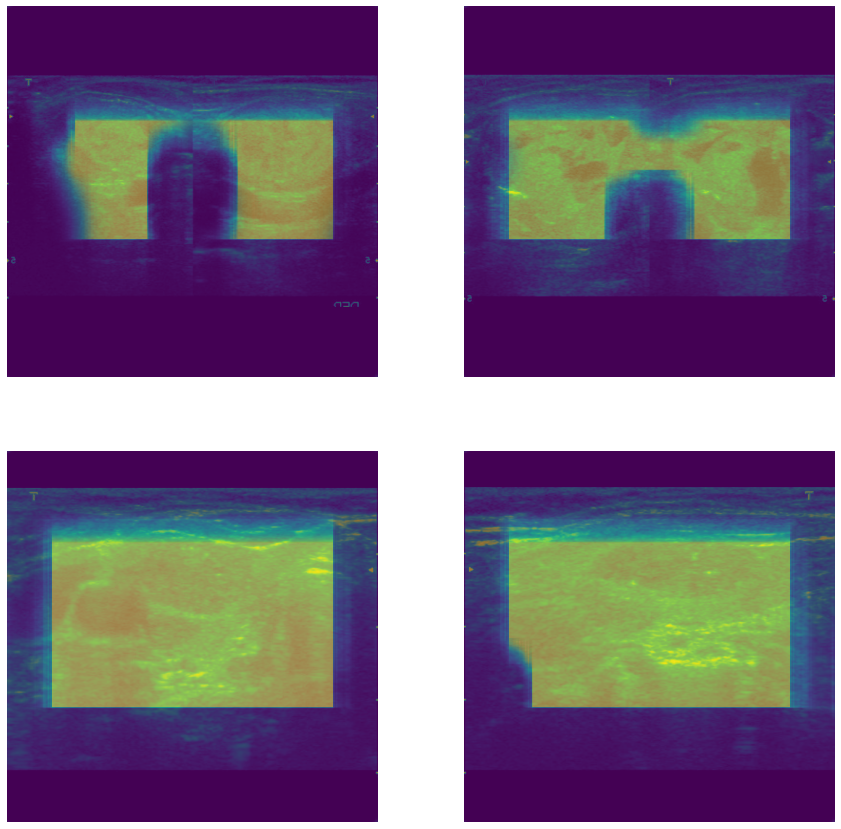

In [123]:
images, masks = train_gen.__getitem__(1)
predictions = unet.predict(images)

i = 0
plt.figure(figsize=(15, 15))
for image, pred in zip(images, predictions):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.imshow(pred, alpha=0.5)
    plt.axis('off')
    i+=1
plt.show()

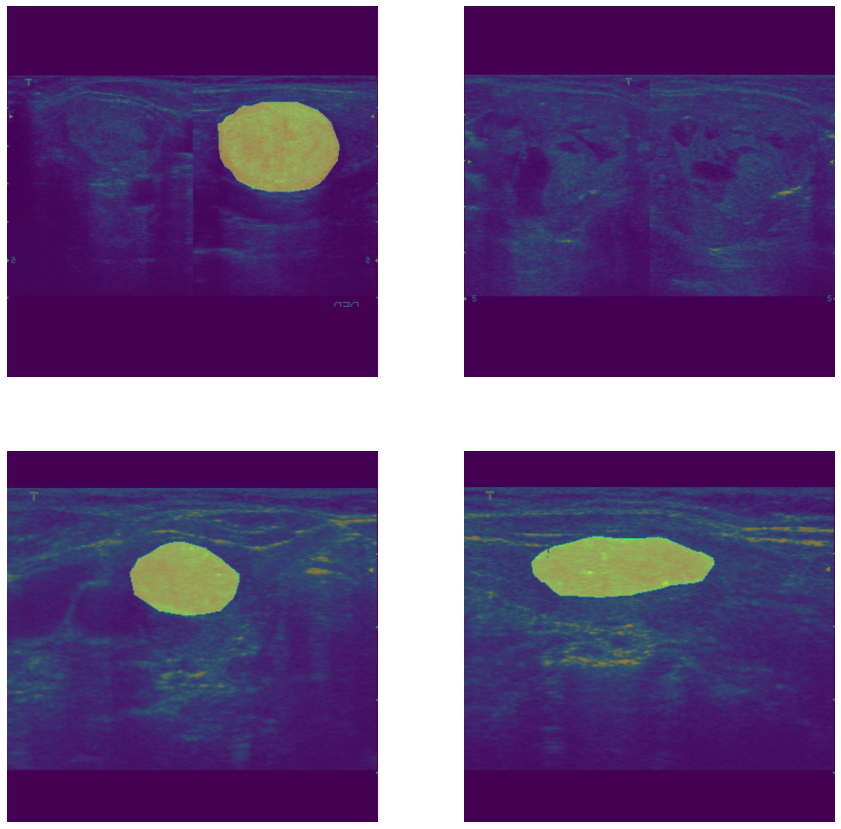

In [124]:
images, masks = train_gen.__getitem__(1)

i = 0
plt.figure(figsize=(15, 15))
for image, mask in zip(images, masks):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)
    plt.axis('off')
    i+=1
plt.show()

In [69]:
predictions

array([[[[0.00592629],
         [0.00592629],
         [0.00778758],
         ...,
         [0.05149145],
         [0.11908459],
         [0.11908459]],

        [[0.00592629],
         [0.00592629],
         [0.00778758],
         ...,
         [0.05149145],
         [0.11908459],
         [0.11908459]],

        [[0.00022935],
         [0.00022935],
         [0.00045701],
         ...,
         [0.02074728],
         [0.05464649],
         [0.05464649]],

        ...,

        [[0.00059703],
         [0.00059703],
         [0.00120317],
         ...,
         [0.03921248],
         [0.07832637],
         [0.07832637]],

        [[0.00936766],
         [0.00936766],
         [0.01167095],
         ...,
         [0.04046821],
         [0.09449806],
         [0.09449806]],

        [[0.00936766],
         [0.00936766],
         [0.01167095],
         ...,
         [0.04046821],
         [0.09449806],
         [0.09449806]]],


       [[[0.00592629],
         [0.00592629],
         [0.00

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(4):
    rj_inp, rj_re = random_jitter(rgb_labels[0], images[0])
    plt.subplot(2, 2, i + 1)
    plt.imshow(rj_inp)
    plt.axis('off')
plt.show()

### Another Model

In [15]:
# this block essentially performs 2 convolution

def Conv2dBlock(inputTensor, numFilters, kernelSize = 3, doBatchNorm = True):
    #first Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (inputTensor)
    
    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)
        
    x =tf.keras.layers.Activation('relu')(x)
    
    #Second Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (x)
    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)
        
    x = tf.keras.layers.Activation('relu')(x)
    
    return x


# Now defining Unet 
def GiveMeUnet(inputImage, numFilters = 16, droupouts = 0.1, doBatchNorm = True):
    # defining encoder Path
    c1 = Conv2dBlock(inputImage, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)
    p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)
    p1 = tf.keras.layers.Dropout(droupouts)(p1)
    
    c2 = Conv2dBlock(p1, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)
    p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)
    p2 = tf.keras.layers.Dropout(droupouts)(p2)
    
    c3 = Conv2dBlock(p2, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)
    p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)
    p3 = tf.keras.layers.Dropout(droupouts)(p3)
    
    c4 = Conv2dBlock(p3, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)
    p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)
    p4 = tf.keras.layers.Dropout(droupouts)(p4)
    
    c5 = Conv2dBlock(p4, numFilters * 16, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    # defining decoder path
    u6 = tf.keras.layers.Conv2DTranspose(numFilters*8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    u6 = tf.keras.layers.Dropout(droupouts)(u6)
    c6 = Conv2dBlock(u6, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    u7 = tf.keras.layers.Conv2DTranspose(numFilters*4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    
    u7 = tf.keras.layers.concatenate([u7, c3])
    u7 = tf.keras.layers.Dropout(droupouts)(u7)
    c7 = Conv2dBlock(u7, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    u8 = tf.keras.layers.Conv2DTranspose(numFilters*2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    u8 = tf.keras.layers.Dropout(droupouts)(u8)
    c8 = Conv2dBlock(u8, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    u9 = tf.keras.layers.Conv2DTranspose(numFilters*1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1])
    u9 = tf.keras.layers.Dropout(droupouts)(u9)
    c9 = Conv2dBlock(u9, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    output = tf.keras.layers.Conv2D(1, (1, 1), activation = 'sigmoid')(c9)
    model = tf.keras.Model(inputs = [inputImage], outputs = [output])
    return model

In [15]:
inputs = tf.keras.layers.Input((512, 512, 1))
myTransformer = GiveMeUnet(inputs, droupouts= 0.07)
myTransformer.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [16]:
myTransformer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [31]:
history = myTransformer.fit(train_gen, validation_data=val_gen, epochs=10, callbacks=[early_stopping])

Epoch 1/10
105/105 [==============================] - 10s 96ms/step - loss: 0.1245 - accuracy: 0.9429 - val_loss: 0.1345 - val_accuracy: 0.9434
Epoch 2/10
105/105 [==============================] - 10s 96ms/step - loss: 0.1226 - accuracy: 0.9441 - val_loss: 0.1436 - val_accuracy: 0.9369
Epoch 3/10
105/105 [==============================] - 10s 96ms/step - loss: 0.1275 - accuracy: 0.9409 - val_loss: 0.1274 - val_accuracy: 0.9444
Epoch 4/10
105/105 [==============================] - 10s 97ms/step - loss: 0.1160 - accuracy: 0.9470 - val_loss: 0.1384 - val_accuracy: 0.9365
Epoch 5/10
105/105 [==============================] - 10s 97ms/step - loss: 0.1169 - accuracy: 0.9476 - val_loss: 0.1371 - val_accuracy: 0.9434
Epoch 6/10
105/105 [==============================] - 10s 98ms/step - loss: 0.1157 - accuracy: 0.9473 - val_loss: 0.1460 - val_accuracy: 0.9426
Epoch 7/10
105/105 [==============================] - 10s 98ms/step - loss: 0.1066 - accuracy: 0.9520 - val_loss: 0.1475 - val_accuracy:

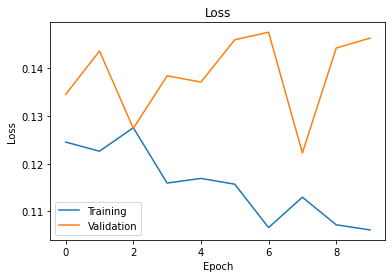

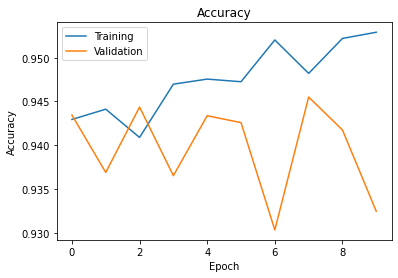

In [32]:
plot_history(history)

1/1 [==============================] - 0s 18ms/step


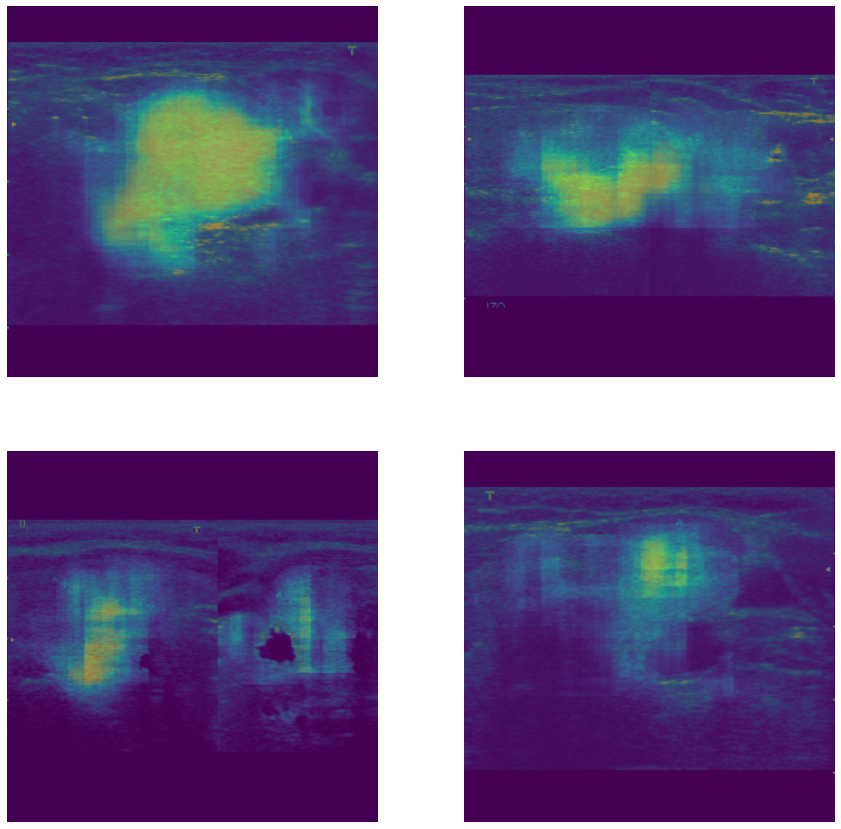

In [33]:
images, masks = val_gen.__getitem__(1)
predictions = myTransformer.predict(images)

i = 0
plt.figure(figsize=(15, 15))
for image, pred in zip(images, predictions):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.imshow(pred, alpha=0.5)
    plt.axis('off')
    i+=1
plt.show()

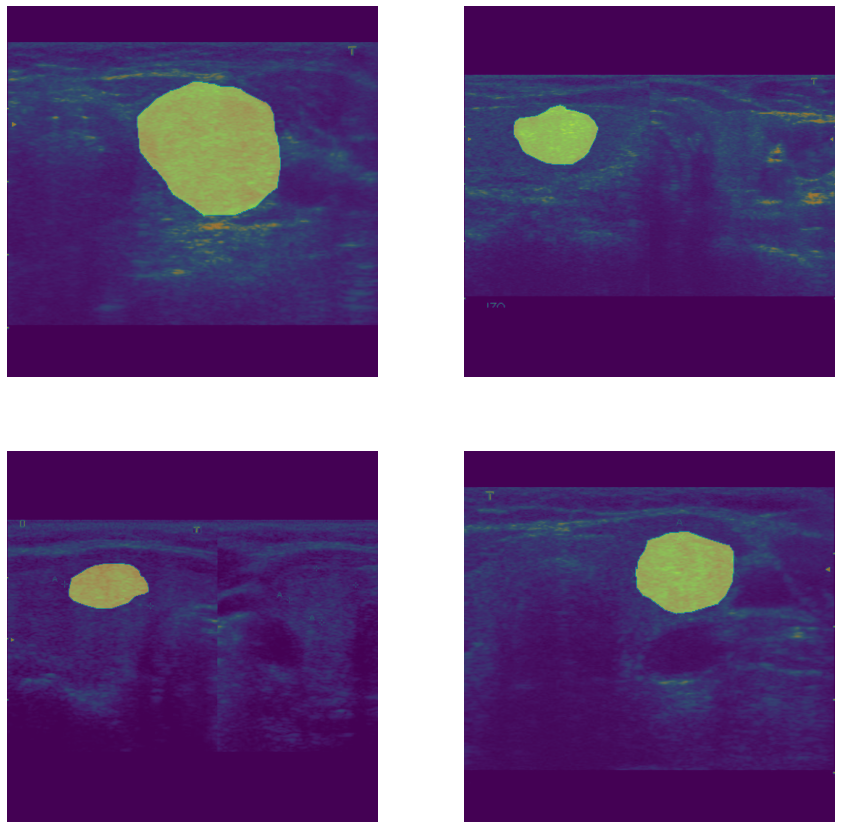

In [24]:
images, masks = val_gen.__getitem__(1)

i = 0
plt.figure(figsize=(15, 15))
for image, mask in zip(images, masks):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)
    plt.axis('off')
    i+=1
plt.show()